# Modèle Régression Logistique

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Préparation des données

In [16]:
df = pd.read_csv('/Users/maellemarcelin/Documents/sudria/Ingé3/projet/projetIA/projetIA/3- Dataset/dataset_clean.csv',sep=',',encoding='utf8')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3569152 entries, 0 to 3569151
Data columns (total 76 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

### Sélection des colonnes

In [18]:
df_select = df.drop(["Protocol","ECE.Flag.Count","RST.Flag.Count","Active.Max","Active.Min","Idle.Mean","Idle.Max","Active.Mean","Idle.Std","Bwd.Packet.Length.Min","FIN.Flag.Count","Min.Packet.Length","Idle.Min","Active.Std","URG.Flag.Count","SYN.Flag.Count","ACK.Flag.Count","Fwd.Packet.Length.Min","Fwd.PSH.Flags","PSH.Flag.Count","Subflow.Fwd.Packets","Total.Fwd.Packets","Subflow.Bwd.Packets","Subflow.Bwd.Bytes","Total.Length.of.Bwd.Packets","Down.Up.Ratio","Bwd.Header.Length","Packet.Length.Variance","Packet.Length.Mean","Subflow.Fwd.Bytes","Max.Packet.Length","Packet.Length.Std","min_seg_size_forward","Fwd.IAT.Max","Average.Packet.Size","Flow.IAT.Mean","Flow.Packets.s","Fwd.Packet.Length.Max","act_data_pkt_fwd", "Fwd.Header.Length", "Fwd.Header.Length.1","Avg.Bwd.Segment.Size","Bwd.Packet.Length.Min","Total.Backward.Packets","Bwd.Packet.Length.Max","Bwd.Packet.Length.Std","Flow.IAT.Std","Bwd.IAT.Min","Fwd.IAT.Total","Fwd.IAT.Std","Flow.ID","Source.IP","Destination.IP","Timestamp","Bwd.Packet.Length.Mean"], axis=1)

### Sélection du nombre réduit de sortie

In [19]:
df_reduce = df_select[(df_select['ProtocolName'] == 'AMAZON') | (df_select['ProtocolName'] == 'YOUTUBE') | (df_select['ProtocolName'] == 'MICROSOFT') | (df_select['ProtocolName'] == 'GMAIL')]

### Sélection des variables explicatives et cibles

In [20]:
X = df_reduce.drop(['ProtocolName',"L7Protocol"], axis=1) 
y = df_reduce['ProtocolName']

## Modèle

### préparation des set train et test 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Création du modèle

In [22]:
cols = X_train.columns

In [23]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### Entrainement et prédiction

In [25]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
y_pred_train = logreg.predict(X_train)

array(['YOUTUBE', 'YOUTUBE', 'MICROSOFT', ..., 'YOUTUBE', 'YOUTUBE',
       'YOUTUBE'], dtype=object)

In [33]:
y_pred_test = logreg.predict(X_test)
y_test

1633226      YOUTUBE
3481396        GMAIL
164484     MICROSOFT
1482061        GMAIL
2708178      YOUTUBE
             ...    
3143182    MICROSOFT
283475       YOUTUBE
6318         YOUTUBE
3020216       AMAZON
750955     MICROSOFT
Name: ProtocolName, Length: 70523, dtype: object

## Métriques

### Accuracy

In [28]:
print("Accuracy sur les données de test: {0:0.4f}". format(accuracy_score(y_test, y_pred_test)))
print("Accuracy sur les données d'entrainement: {0:0.4f}". format(accuracy_score(y_train, y_pred_train)))

Accuracy sur les données de test: 0.5466
Accuracy sur les données d'entrainement: 0.5443


array([[ 4979,    50,   762, 11611],
       [ 1129,   125,   121,  6667],
       [ 1477,    16,  1449,  7940],
       [ 1817,    60,   328, 31992]])

<AxesSubplot: >

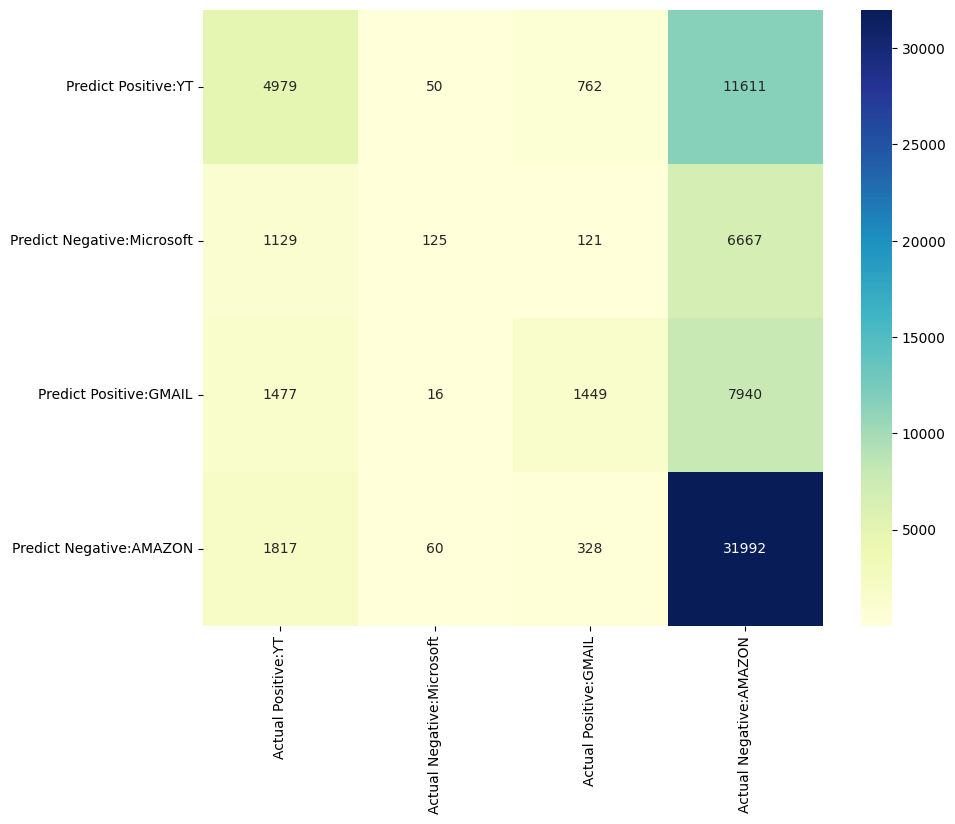

Accuracy : 0.8124


Precision : 0.9901


Recall ou Rappel : 0.8152


Le taux de faux positif : 0.2857


Spécificité : 0.7143


F1-score : 0.8941
